# Zadanie (przedziały ufności)

Zmierzono wytrzymałość 10 losowo wybranych gotowych elementów konstrukcji budowlanych i otrzymano następujące wyniki: 

383, 284, 339, 340, 305, 386, 378, 335, 344, 346.

Zakładamy, że rozkład wytrzymałości tych elementów jest rozkładem normalnym $N(\mu,\sigma^2)$ o nieznanych parametrach. Wyznaczyć na podstawie tej próbki 95%-ową realizację przedziału ufności dla nieznanej wartości parametru $\mu$ badanej cechy populacji. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

In [2]:
data=np.array([383, 284, 339, 340, 305, 386, 378, 335, 344, 346])
print(data)

[383 284 339 340 305 386 378 335 344 346]


Przedział ufności dla <b>nieznanej wartości przeciętnej $\mu$</b> populacji, w której <b>badana cecha ma rozkład $N(\mu,\sigma^2)$</b>, w przypadku gdy <b>zarówno $\mu$ jak $\sigma$ są nieznane</b>, na podstawie $n$--elementowej próby $X_1,\ldots,X_n$ <b>($n<100$)</b> 
wynosi

$$
\left(
\bar X - t \left(1-\frac{\alpha}{2},n-1 \right) \frac{S}{\sqrt{n-1}},
\bar X + t \left(1-\frac{\alpha}{2},n-1 \right) \frac{S}{\sqrt{n-1}}
\right)
$$

gdzie 

$$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2
\mbox{ oraz }
\bar X = \frac{1}{n} \sum_{i=1}^{n} X_{i} 
$$

oraz $t(\alpha,n)$ oznacza kwantyl rzędu $\alpha$ o $n$ stopniach swobody rozkładu $t$--Studenta.

## Zdefiniuj zmienną losową

In [3]:
n=len(data)
alpha=0.05
t_dist = stats.t(n-1)

## Wylicz końce przedziałów

In [6]:
S = np.std(data, ddof=0)
# L, R - lewy koniec, prawy koniec
L = np.mean(data) - t_dist.ppf(1-alpha/2)*S/np.sqrt(n-1)
print(L)
R = np.mean(data) + t_dist.ppf(1-alpha/2)*S/np.sqrt(n-1)
print(R)

320.5297030458652
367.4702969541348


## Wypisz przedział ufności

In [7]:
print(r'( %3.2f , %3.2f)' % (L,R))

( 320.53 , 367.47)


# Zadanie 2
Wykonaj zadanie za pomocą <tt>scipy</tt> i <tt>funkcji stats.t.interval</tt>.

In [8]:
# to samo zadanie przy użyciu gotowej funkcji
stats.t.interval(1-alpha, n-1, np.mean(data), S/np.sqrt(n-1))

(320.5297030458652, 367.4702969541348)

# Zadanie 3
Narysuj przedział ufności na wykresie gęstości i dystrybuanty dla statystyki

$$
t = \frac{\bar X - \mu}{S}\sqrt{n-1}
$$

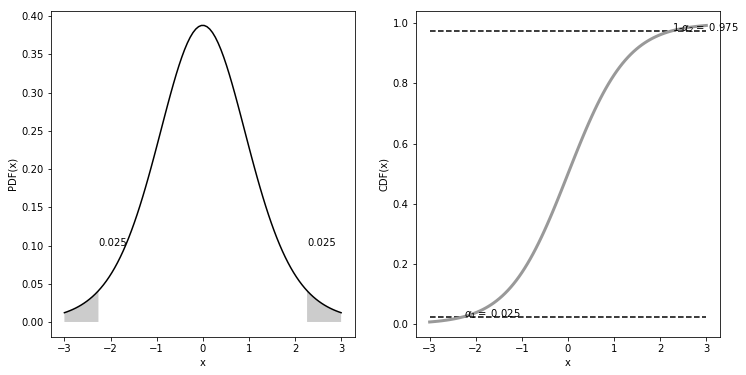